In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from astropy import units
from astropy import constants as const

# Optional:
from astropy.visualization import quantity_support
from matplotlib_inline.backend_inline import set_matplotlib_formats
quantity_support()
set_matplotlib_formats('svg')

### Bremsstrahlung

Dipole pattern. Classical case is for beta = 0. 

Using cartesian plotting:

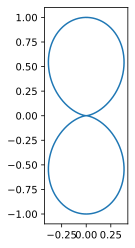

In [2]:
θ = numpy.linspace(0, 2 * numpy.pi, 1000)
beta = 0.0
r = numpy.sin(θ) ** 2 / (1 - beta * numpy.cos(θ))**5

x = r * numpy.cos(θ)
y = r * numpy.sin(θ)

fig, ax = plt.subplots()
ax.plot(x, y);
ax.set_aspect('equal')

And using the more convenient polar plot:

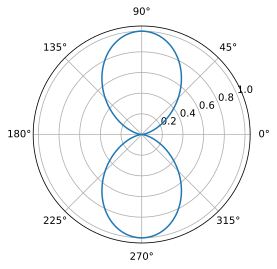

In [3]:
θ = numpy.linspace(0, 2 * numpy.pi, 1000)
beta = 0.0
r = numpy.sin(θ) ** 2 / (1 - beta * numpy.cos(θ))**5
plt.polar(θ, r);

Relativistic case, $\beta=v/c$:

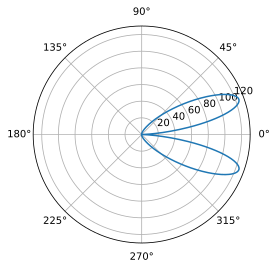

In [4]:
θ = numpy.linspace(0, 2 * numpy.pi, 1000)
beta = 0.8
r = numpy.sin(θ) ** 2 / (1 - beta * numpy.cos(θ))**5
plt.polar(θ, r);

In 3D, cut in half for better visualisation:

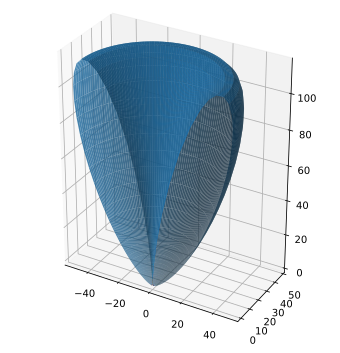

In [5]:
PHI, THETA = numpy.linspace(-numpy.pi/2, numpy.pi/2, 100), numpy.linspace(0, numpy.pi, 100)
phi, theta = numpy.meshgrid(PHI, THETA)

beta = 0.8
r = numpy.sin(theta)**2 / (1 - beta * numpy.cos(theta))**5

X = r * numpy.sin(phi) * numpy.sin(theta) 
Y = r * numpy.cos(phi) * numpy.sin(theta) 
Z = r * numpy.cos(theta)

fig = plt.figure(figsize=(6,6),dpi=130)
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, #cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.8)
# Set aspect ratio to be equal in all dimensions
ax.set_box_aspect((numpy.ptp(X), numpy.ptp(Y), numpy.ptp(Z)));

### Thomson scattering

Direction of propagation is perpendicular to acceleration (E field), so angle $\theta$ is the complementary of the Bremsstrahlung. For linearly polarised radiation:

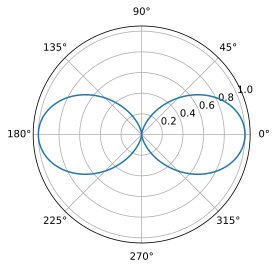

In [6]:
theta = numpy.linspace(0, 2 * numpy.pi, 1000)
r = numpy.sin(theta - numpy.pi/2) ** 2 
plt.polar(theta, r);

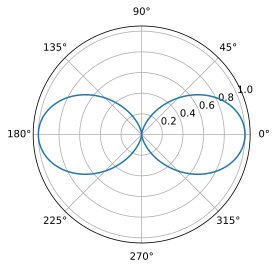

In [7]:
phi = numpy.linspace(0, 2 * numpy.pi, 1000)
r = numpy.cos(phi) ** 2 
plt.polar(phi, r);

For the unpolarised case:

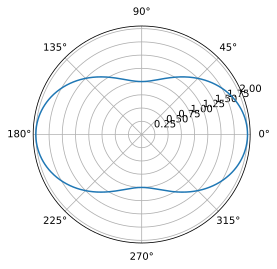

In [8]:
phi = numpy.linspace(0, 2 * numpy.pi, 1000)
r = 1 + numpy.cos(phi) ** 2 
plt.polar(phi, r);

In 3D:

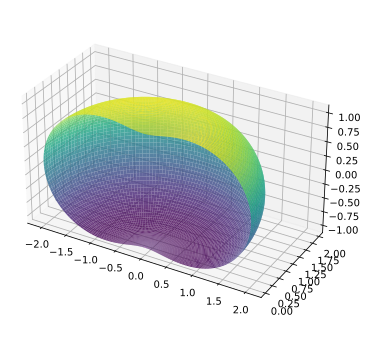

In [9]:
PHI, THETA = numpy.linspace(-numpy.pi/2, numpy.pi/2, 100), numpy.linspace(0, numpy.pi, 100)
#PHI, THETA = numpy.linspace(0, 2 * numpy.pi, 100), numpy.linspace(0, numpy.pi, 100)
phi, theta = numpy.meshgrid(PHI, THETA)


r = 1+numpy.sin(theta)**2 

X = r * numpy.sin(phi) * numpy.sin(theta) 
Y = r * numpy.cos(phi) * numpy.sin(theta) 
Z = r * numpy.cos(theta)

fig = plt.figure(figsize=(6,6),dpi=130)
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('viridis'),
    linewidth=0, antialiased=False, alpha=0.8)
# Set aspect ratio to be equal in all dimensions
ax.set_box_aspect((numpy.ptp(X), numpy.ptp(Y), numpy.ptp(Z)));

### Compton-Klein-Nishina scattering

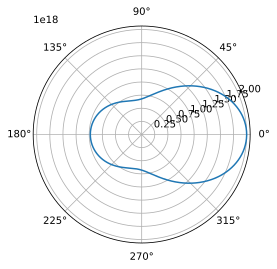

In [10]:
phi = numpy.linspace(0, 2 * numpy.pi, 1000)

def diff_sigma(wave1, theta):
    # Compton formula
    wave2 = (const.h / (const.m_e * const.c) * (1 - numpy.cos(theta)) + wave1)
    # Klein-Nishina formula
    return (wave1 / wave2)**2 * (wave1 / wave2 + wave2 / wave1 - numpy.sin(theta)**2)

r = diff_sigma(0.01 * units.nm, phi).value

plt.polar(phi, r);

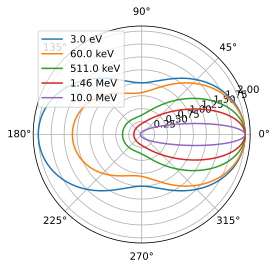

In [11]:
energies = [3 * units.eV, 60 * units.keV, 511 * units.keV, 1.46 * units.MeV, 10 * units.MeV]

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='polar')

for e in energies:
    r = diff_sigma(e.to('nm', equivalencies=units.spectral()), phi).value / 1e18
    ax.plot(phi, r, label=e)
plt.legend();

In 3D:

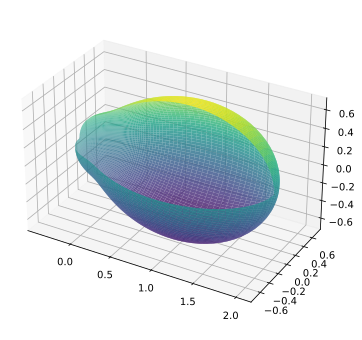

In [12]:
PHI, THETA = numpy.linspace(-numpy.pi, numpy.pi/2, 100), numpy.linspace(0, numpy.pi, 100)
phi, theta = numpy.meshgrid(PHI, THETA)

r = diff_sigma((511 * units.keV).to('nm', equivalencies=units.spectral()), theta).value / 1e18

Z = r * numpy.sin(phi) * numpy.sin(theta) 
Y = r * numpy.cos(phi) * numpy.sin(theta) 
X = r * numpy.cos(theta)

fig = plt.figure(figsize=(6,6),dpi=130)
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('viridis'),
    linewidth=0, antialiased=False, alpha=0.8)
# Set aspect ratio to be equal in all dimensions
ax.set_box_aspect((numpy.ptp(X), numpy.ptp(Y), numpy.ptp(Z)));